### Fremont Bridge Bicycle Counter

In [1]:
import os 
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline
plt.style.use('seaborn')

In [21]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename = 'Fremont.csv', url = URL, force_download = False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, 'Fremont.csv')
    data = pd.read_csv('Fremont.csv', index_col = 'Date', parse_dates = True)
    data.columns = ['Total','West', 'East']
    return data

In [22]:
data = get_fremont_data()

In [23]:
data.head()

,Total,West,East
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


<AxesSubplot:xlabel='Date'>

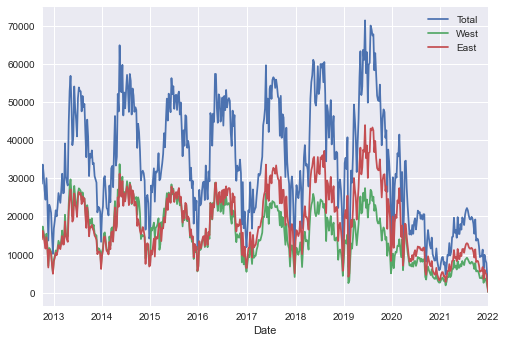

In [24]:
data.resample('w').sum().plot()

In [25]:
data.resample('w').sum()

,Total,West,East
Date,,,
2012-10-07,28584.0,14594.0,13990.0
2012-10-14,33590.0,17358.0,16232.0
2012-10-21,31018.0,15892.0,15126.0
2012-10-28,26874.0,13802.0,13072.0
2012-11-04,24388.0,12816.0,11572.0
...,...,...,...
2021-12-05,9951.0,3911.0,6040.0
2021-12-12,8526.0,3324.0,5202.0
2021-12-19,7826.0,3006.0,4820.0


<AxesSubplot:xlabel='Date'>

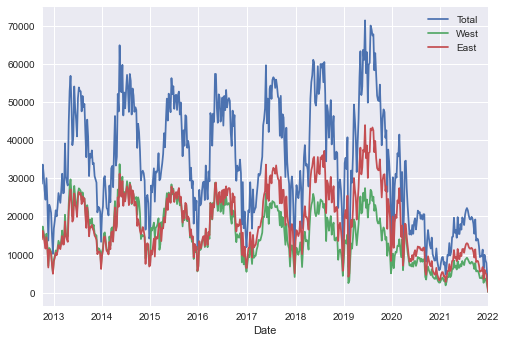

In [26]:
data.resample('w').sum().plot()

<AxesSubplot:xlabel='Date'>

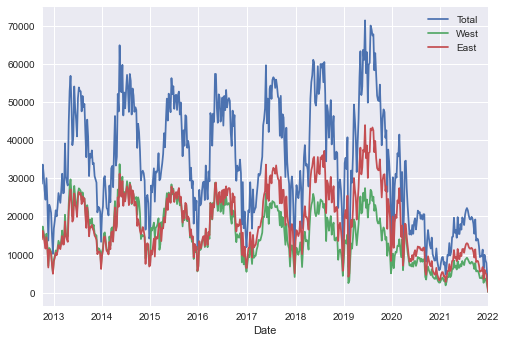

In [27]:
data.resample('w').sum().plot()

In [32]:
pd.options.display.max_rows = None

<AxesSubplot:xlabel='Date'>

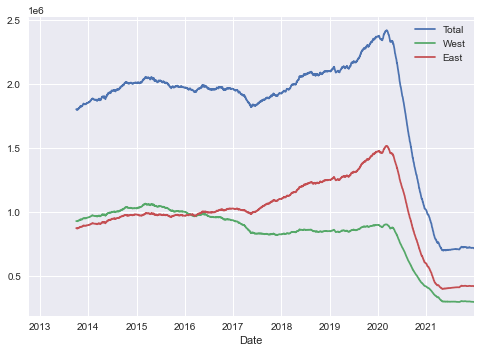

In [28]:
data.resample('D').sum().rolling(365).sum().plot()

(0.0, 2526684.75)

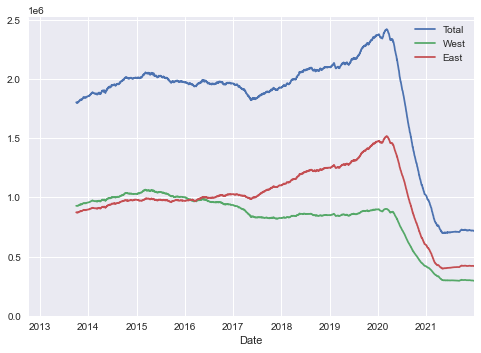

In [29]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

<AxesSubplot:xlabel='time'>

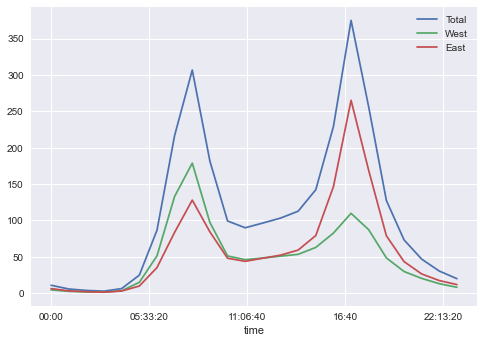

In [30]:
data.groupby(data.index.time).mean().plot()

In [44]:
pivoted = data.pivot_table('Total', index = data.index.time , columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

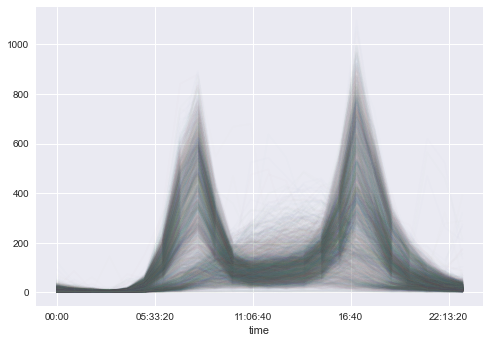

In [46]:
pivoted.plot(legend = False , alpha = 0.01)